##### Multivariate exploration means generation of visuals based on a three or more variables.
<ul>
    <li><a href="#size">Encoding via Size </a></li>
    <li><a href="#shape">Encoding via Shape </a></li>
    <li><a href="#color">Encoding via Color </a></li>
</ul>
Encoding via color is the most common practise while working with multivariate exploration

In [32]:
# imoport libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [33]:
#reading fuel data
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [34]:
fuel_econ['trans'] = fuel_econ['trans'].apply(lambda x : x.split()[0])
fuel_econ['trans'].value_counts()

Automatic    3068
Manual        861
Name: trans, dtype: int64

In [42]:
# taking random sample of 200
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False )
fuel_econ_subset = fuel_econ.loc[sample]

<a id = 'size'></a>
### Encoding via size
Encoding via Shape
Point size is a good encoding for numeric variables.  

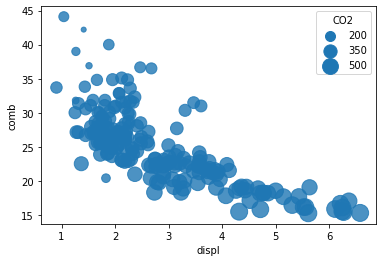

In [36]:
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', x_jitter = 0.4, fit_reg = False, 
          scatter_kws = {'s' : fuel_econ_subset['co2']/2})

# dummy series for adding legend
sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/2, color = base_color))
plt.legend(legend_obj, sizes, title = 'CO2')

<a id = 'shape'></a>
### Encoding via Shape
Shape is a good encoding for categorical variables, using one shape for each level of the categorical variable. 

Text(0, 0.5, 'Displacement')

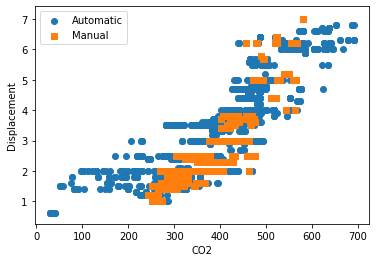

In [37]:
markers = [['Automatic', 'o'],
               ['Manual', 's']]

for tran, marker in markers:
    fuel_econ_tran = fuel_econ[fuel_econ['trans'] == tran]
    plt.scatter(data = fuel_econ_tran, x = 'co2', y = 'displ', marker = marker)
plt.legend(['Automatic','Manual'])
plt.xlabel('CO2')
plt.ylabel('Displacement')

<a id = 'color'></a>
### Encoding via Color
Color is a very common encoding for variables, for both qualitative and quantitative variables. 

Text(0, 0.5, 'Combined fuel')

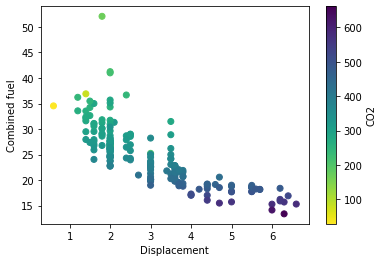

In [45]:
# working with quantitative data
# using matplotlib
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2',
            cmap = 'viridis_r')
plt.colorbar(label = 'CO2')
plt.xlabel('Displacement')
plt.ylabel('Combined fuel')

Text(9.924999999999997, 0.5, 'Displacement')

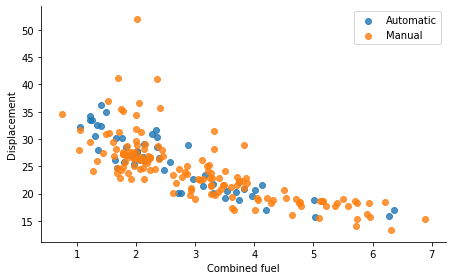

In [44]:
# working with qualitative data
# using seaborn
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans', size = 4, aspect = 1.6)
g.map(sb.regplot, 'displ' , 'comb' , x_jitter = 0.4, fit_reg = False)
plt.legend(['Automatic','Manual'])
plt.xlabel('Combined fuel')
plt.ylabel('Displacement')